<a href="https://colab.research.google.com/github/bunkorner/VR_Assignment2/blob/main/Assignment_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
img1 = cv2.imread('gdrive/My Drive/CV/Assignment_2/First.jpg')
img1 = cv2.resize(img1, (0,0), fx=0.3, fy=0.3)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [ ]:
img2 = cv2.imread('gdrive/My Drive/CV/Assignment_2/Second.jpg')
img2 = cv2.resize(img2, (0,0), fx=0.3, fy=0.3)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

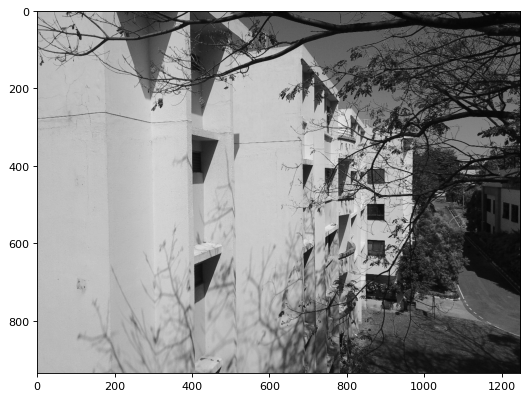

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(gray1, cmap="gray")

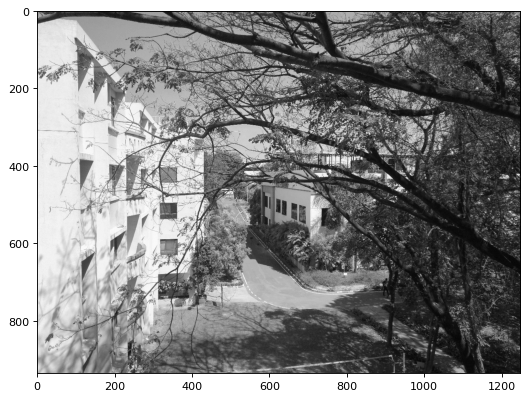

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(gray2, cmap="gray")

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

Initializing SIFT object from cv2 library

In [ ]:
keyPoint1, des1 = sift.detectAndCompute(gray1, None)
keyPoint2, des2 = sift.detectAndCompute(gray2, None)

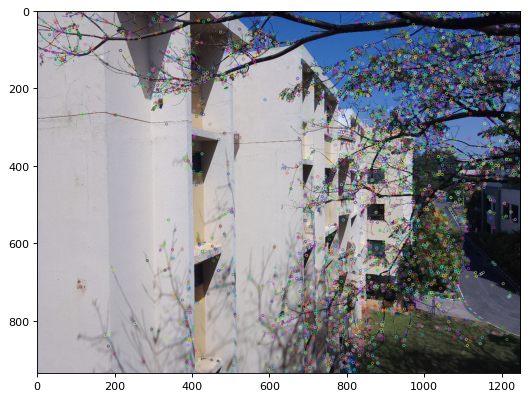

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(cv2.drawKeypoints(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), keyPoint1, None))

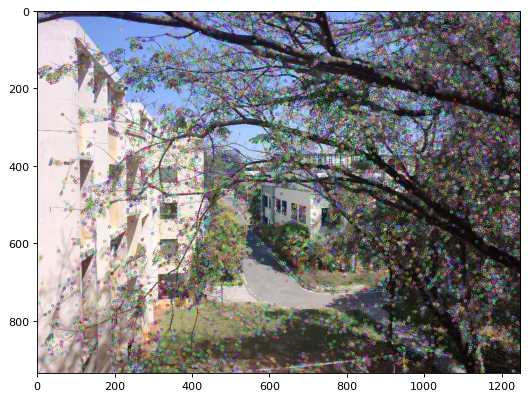

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(cv2.drawKeypoints(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), keyPoint2, None))

In [ ]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
matchi = cv2.BFMatcher()
# matchi = cv2.FlannBasedMatcher(index_params, search_params)
matches = matchi.knnMatch(des1, des2, k=2)

In [ ]:
draw_params = dict(matchColor=(0,0,255),
                   singlePointColor=None,
                   flags=2)

In [ ]:
good = []
for m,n in matches:
  if m.distance < 0.5 * n.distance:
    good.append(m)

In [ ]:
img1_mat = cv2.drawMatches(img1, keyPoint1, img2, keyPoint2, good, None, **draw_params)

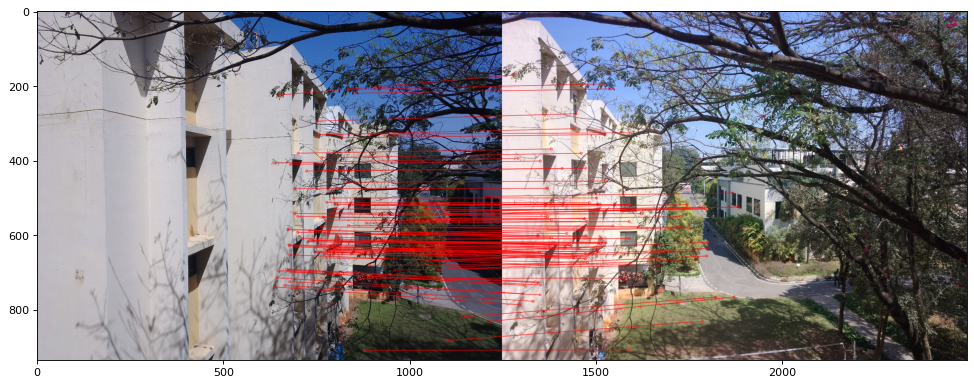

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
plt.imshow(cv2.cvtColor(img1_mat, cv2.COLOR_BGR2RGB))

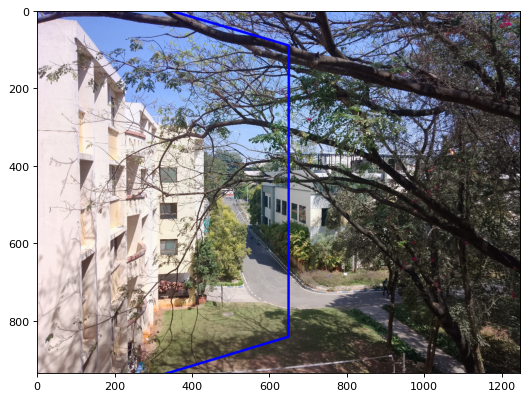

In [ ]:
src_pts = np.float32([ keyPoint1[m.queryIdx].pt for m in good ]).reshape(-1, 1, 2)
dst_pts = np.float32([ keyPoint2[m.trainIdx].pt for m in good ]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
h, w = gray1.shape
pts = np.float32([ [0, 0], [0, h-1], [w-1, h-1], [w-1, 0] ]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, M)
# img1_lines = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
plt.figure(figsize=(15, 6), dpi=80)
plt.imshow(cv2.cvtColor(img1_lines, cv2.COLOR_BGR2RGB))

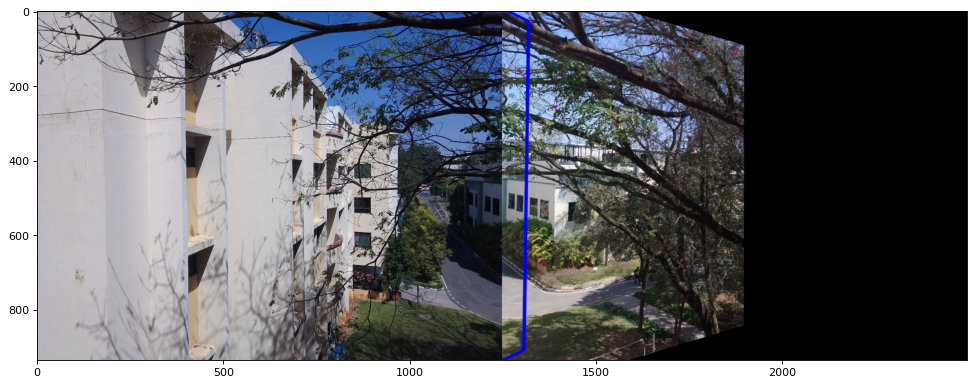

In [ ]:
dust = cv2.warpPerspective(img2,M,(img2.shape[1] + img1.shape[1], img2.shape[0]))
temp = dust[0:img1.shape[0], 0:img1.shape[1]]
# dust[0:img1.shape[0], 0:img1.shape[1]] = img1
# dust[0:img1.shape[0], img1.shape[1]:img2.shape[1] + img1.shape[1]]=temp
plt.figure(figsize=(15, 6), dpi=80)
plt.imshow(cv2.cvtColor(im_h, cv2.COLOR_BGR2RGB))

In [ ]:
im_h = cv2.hconcat([img1, temp])

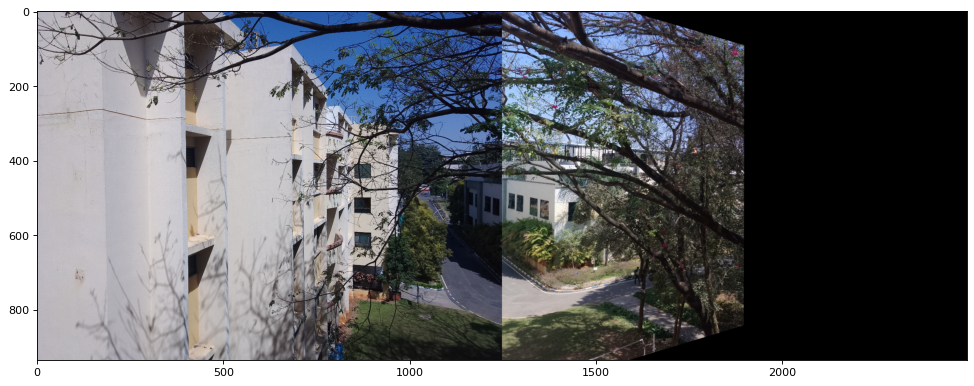

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
plt.imshow(cv2.cvtColor(im_h, cv2.COLOR_BGR2RGB))

In [ ]:
def trim(frame):
    if not np.sum(frame[0]):
        return trim(frame[1:])
    elif not np.sum(frame[-1]):
        return trim(frame[:-1])
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-1])    
    return frame

In this step we are iterating through every Pixel and adding values from all the three channels if it is 0(Zero), then it is a black Pixel and we don't want it. So we trimmed it using trim() function.

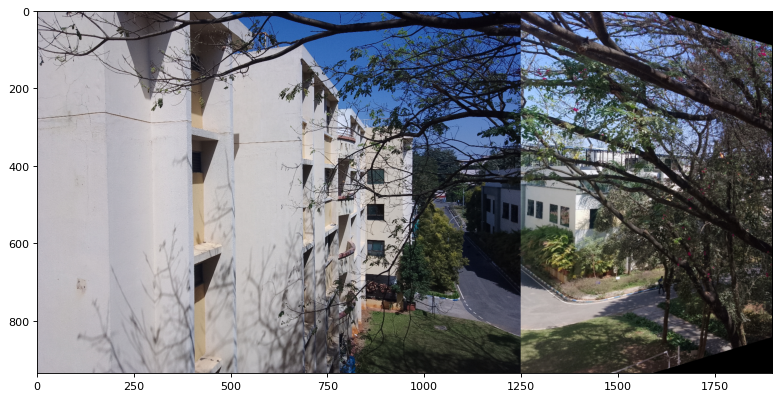

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
plt.imshow(cv2.cvtColor(trim(im_h), cv2.COLOR_BGR2RGB))

As we can see, exept for the intensities, the picture is matched almost perfectly.

Review:

1.) Detecting key points and extracting local invariant descriptors using various techniques such as (SIFT, SURF, ORB).

2.) Get matching descriptors between images using various techniques such as (BFMatcher, FlannBasedMatcher)

3.) Applied RANSAC to estimate the homography matrix. 

4.) Applied a warping transformation using the homography matrix.